Notebook atualizado em: 26/05/2020

## *Análise de dados do Google Analytics*

O *Google Analytics* é um sistema de monitoramento de tráfego que pode ser instalado em qualquer site, loja virtual ou blog, e é uma ferramenta fundamental para o marketing digital.

Para saber mais: https://pt.shopify.com/blog/google-analytics-para-e-commerce


### Importando as bibiliotecas

In [ ]:
# Para os plots 
import matplotlib.pyplot as plt
import seaborn as sns

# para leitura e tratamento dos dados
import pandas as pd
import numpy as np

# mudando o estilo dos gráficos para fundo branco
sns.set_style('ticks')
sns.set_style('white')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Autentica e cria um cliente PyDrive
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


### Leitura dos dados
Tipos de dados, parâmetros, lidando com datas etc

- pd.read_csv - para leituras de arquivos csv, podemos passar o demilitador no parâmetro *delimiter*.

- pd.read_excel  - arquivos excel (xlsx)

**IMPORTANTE**: Aqui eu salvei a pasta "Estatística Descrita" com os dados no meu drive, por isso posso passar o caminho abaixo. Aqui no colab, à esquerda tem um ícone de *Files*, lá você consegue entrar nas pastas drive > My Drive e procurar o caminho do arquivo usado.

Aqui estamos apenas visualizando as 5 primeiras linhas do dataset, não atribuimos ainda a nenhuma variável

In [ ]:
pd.read_csv('/content/drive/My Drive/Estatística Descritiva/base1.csv', parse_dates = True, index_col=0).head()

,Default Channel Grouping,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Avg. Order Value,Revenue
Date,,,,,,,,,,,
2017-01-01,(Other),"2,853",601,"3,521",16.81%,9.80,0:05:45,2.19%,77,R$464.54,"R$35,769.66"
2017-01-01,Direct,"70,210","43,703","82,453",17.43%,8.72,0:05:43,2.93%,"2,415",R$529.65,"R$1,279,096.67"
2017-01-01,Display,"15,274","5,336","22,120",36.22%,6.04,0:03:38,1.21%,268,R$624.46,"R$167,355.36"
2017-01-01,Organic Search,"63,932","29,102","78,351",13.30%,9.72,0:06:30,2.46%,"1,930",R$571.37,"R$1,102,752.87"
2017-01-01,Paid Search,"49,628","23,441","69,517",24.42%,9.31,0:06:13,2.95%,"2,054",R$649.00,"R$1,333,047.95"


Armazenando os dados em um pandas dataframe (df)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Estatística Descritiva/base1.csv', parse_dates = True, index_col=0)

Se quisermos analisar os dados em função das datas, usamos o parâmetro **parse_dates = True**
e no nosso caso passamos a coluna de data para ser index **index_col = 0**

#### Visualizando e identificando as variáveis

- O método head() mostra por padrão as 5 primeiras linhas do nosso datraframe

In [ ]:
df.head()

,Default Channel Grouping,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Avg. Order Value,Revenue
Date,,,,,,,,,,,
2017-01-01,(Other),"2,853",601,"3,521",16.81%,9.80,0:05:45,2.19%,77,R$464.54,35769.66
2017-01-01,Direct,"70,210","43,703","82,453",17.43%,8.72,0:05:43,2.93%,"2,415",R$529.65,1279096.67
2017-01-01,Display,"15,274","5,336","22,120",36.22%,6.04,0:03:38,1.21%,268,R$624.46,167355.36
2017-01-01,Organic Search,"63,932","29,102","78,351",13.30%,9.72,0:06:30,2.46%,"1,930",R$571.37,1102752.87
2017-01-01,Paid Search,"49,628","23,441","69,517",24.42%,9.31,0:06:13,2.95%,"2,054",R$649.00,1333047.95


#### **Tipo dos dados**

- df.info()
- df.dtypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3729 entries, 2017-01-01 to 2018-04-30
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Default Channel Grouping   3729 non-null   object 
 1   Users                      3729 non-null   object 
 2   New Users                  3729 non-null   object 
 3   Sessions                   3729 non-null   object 
 4   Bounce Rate                3729 non-null   object 
 5   Pages / Session            3729 non-null   float64
 6   Avg. Session Duration      3729 non-null   object 
 7   Ecommerce Conversion Rate  3729 non-null   object 
 8   Transactions               3729 non-null   object 
 9   Avg. Order Value           3729 non-null   object 
 10  Revenue                    3729 non-null   object 
dtypes: float64(1), object(10)
memory usage: 349.6+ KB


In [ ]:
df.dtypes

Default Channel Grouping      object
Users                         object
New Users                     object
Sessions                      object
Bounce Rate                   object
Pages / Session              float64
Avg. Session Duration         object
Ecommerce Conversion Rate     object
Transactions                  object
Avg. Order Value              object
Revenue                       object
dtype: object

Tá tudo como objeto! Pode isso, Arnaldo?

#### Tratamento 
Após identificar a natureza das variáveis, podemos nos deparar com valores numéricas com outros tipos de formatação.

**Métodos**: 
- str.replace('caracter a ser substituido', 'caracter substituinte').astype(): 
- str.rstrip('caracter a ser retirado')


Outros métodos para manipulação de strings podem ser encontrados nesse link aqui: https://wiki.python.org.br/ManipulandoStringsComPython

Retirando o "R$" dos dados que indicam dinheiros

In [ ]:
df['Revenue'] = df['Revenue'].str.replace('R','').str.replace('$','').str.replace(',', '').astype(float)

In [ ]:
df['Avg. Order Value'] = df['Avg. Order Value'].str.replace('R','').str.replace('$','').str.replace(',', '').astype(float)

Dados em milhar: precisamos retirar as virgulas para o Python entender aquilo como um número

In [ ]:
df['Users'] = df['Users'].str.replace(',', '').astype(float)
df['New Users'] = df['New Users'].str.replace(',', '').astype(float)
df['Sessions'] = df['Sessions'].str.replace(',', '').astype(float)
df['Transactions']= df['Transactions'].str.replace(',', '').astype(float)

Porcentagens: vamos retirar o caracter "%" e deixar e dividir por 100.

O método "rstrip()" vai retirar o caracter passado à direita. \\
Para retirar algum caracter à esquerda usamos o "lstrip()"

In [ ]:
df['Ecommerce Conversion Rate'] = df['Ecommerce Conversion Rate'].str.rstrip('%').astype(float)/100
df['Bounce Rate'] = df['Bounce Rate'].str.rstrip('%').astype(float)/100

Transformando o tempo médio de sessão para **minutos**

In [ ]:
 df['Avg. Session Duration'] = df['Avg. Session Duration'].str.split(':').apply(lambda x: int(x[0]) * 60 + float(x[1]) + float(x[2])/60)

Visualizando o dataframe

In [ ]:
df.head()

,Default Channel Grouping,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Avg. Order Value,Revenue
Date,,,,,,,,,,,
2017-01-01,(Other),2853.0,601.0,3521.0,0.1681,9.80,5.750000,0.0219,77.0,464.54,35769.66
2017-01-01,Direct,70210.0,43703.0,82453.0,0.1743,8.72,5.716667,0.0293,2415.0,529.65,1279096.67
2017-01-01,Display,15274.0,5336.0,22120.0,0.3622,6.04,3.633333,0.0121,268.0,624.46,167355.36
2017-01-01,Organic Search,63932.0,29102.0,78351.0,0.1330,9.72,6.500000,0.0246,1930.0,571.37,1102752.87
2017-01-01,Paid Search,49628.0,23441.0,69517.0,0.2442,9.31,6.216667,0.0295,2054.0,649.00,1333047.95


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3729 entries, 2017-01-01 to 2018-04-30
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Default Channel Grouping   3729 non-null   object 
 1   Users                      3729 non-null   float64
 2   New Users                  3729 non-null   float64
 3   Sessions                   3729 non-null   float64
 4   Bounce Rate                3729 non-null   float64
 5   Pages / Session            3729 non-null   float64
 6   Avg. Session Duration      3729 non-null   float64
 7   Ecommerce Conversion Rate  3729 non-null   float64
 8   Transactions               3729 non-null   float64
 9   Avg. Order Value           3729 non-null   float64
 10  Revenue                    3729 non-null   float64
dtypes: float64(10), object(1)
memory usage: 349.6+ KB


Agora está tudo certo" Podemos explorar nossos dados! :)

## Estatística Descritiva

### Distribuição de Frequências

Aqui vemos como nossos dados estão distribuidos

#### Frequência de variáveis categóricas
Usamos o barplot onde no eixo x temos a variável categórica e no eixo y a **estimativa** a respeito desta, por exemplo soma de valores, média etc.


Referência: https://seaborn.pydata.org/generated/seaborn.barplot.html

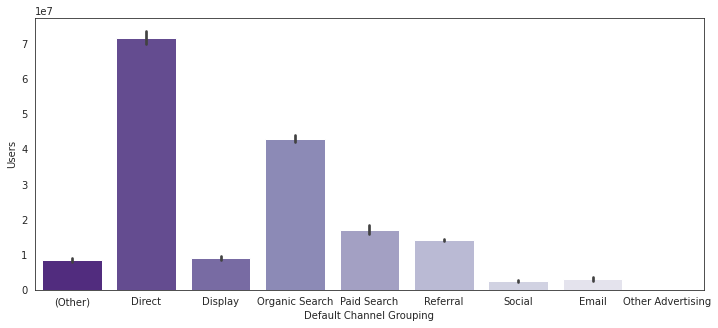

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='Default Channel Grouping', y='Users', estimator=sum, data=df,
          palette='Purples_r')

**Para plotar as barras em ordem crescente ou decrescente, passamos uma lista no parâmetros *order* com a ordem que queremos as barras**

Pra isso, eu vou usar o método groupby que agrupa os dados em uma dimensão, no caso Canais, e a métrica que irei avaliar, no caso abaixo será Receita, com o estimador "média".

O método "sort_values" do pandas ordena a lista, pode ser ascendente ou descendente, ou até mesmo por uma outra coluna. 

In [ ]:
lista = df.groupby('Default Channel Grouping')['Revenue'].mean().sort_values(ascending=False).index
lista

Index(['Direct', 'Organic Search', 'Referral', 'Paid Search', '(Other)',
       'Display', 'Email', 'Social', 'Other Advertising'],
      dtype='object', name='Default Channel Grouping')

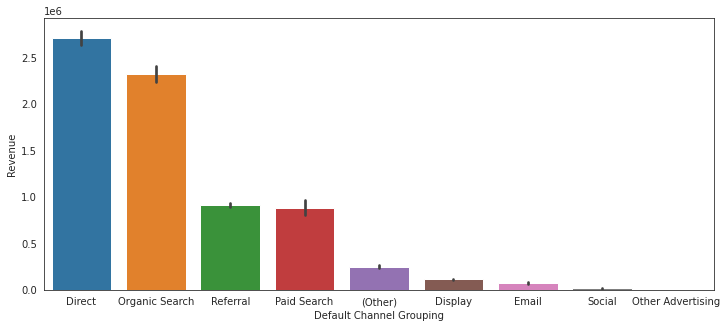

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='Default Channel Grouping', y='Revenue', estimator=np.mean, data=df, order=lista)

#### Frequência absoluta: variáveis numéricas

Usaremos o distplot do seaborn: https://seaborn.pydata.org/generated/seaborn.distplot.html

Passamos False para o parâmetro kde para termos frequencia absoluta

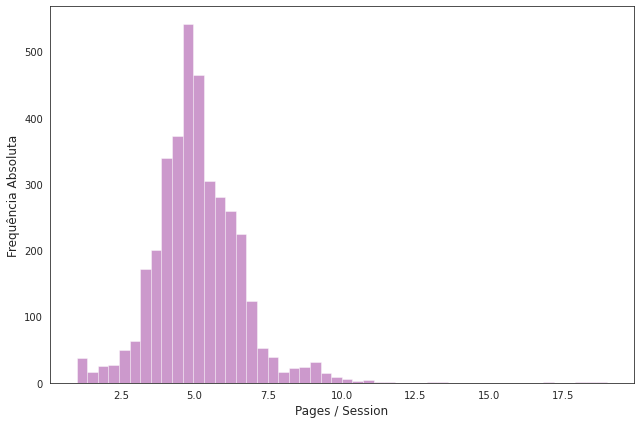

In [ ]:
fig, ax = plt.subplots(figsize=(9,6))

sns.distplot(df['Pages / Session'], color='purple', kde=False)
ax.set_ylabel("Frequência Absoluta", fontsize=12)
ax.set_xlabel("Pages / Session", fontsize=12)

plt.tight_layout()

#### Frequência relativa
Passamos **True** para o parâmetro kde, ele irá plotar a função densidade de probabilidade da variável passada e no eixo y teremos a frequência relativa.

Lembrando que:

$\text{Frequencia Relativa} = \frac{\text{Frequencia Absoluta}}{\text{Total de Observacoes}}$

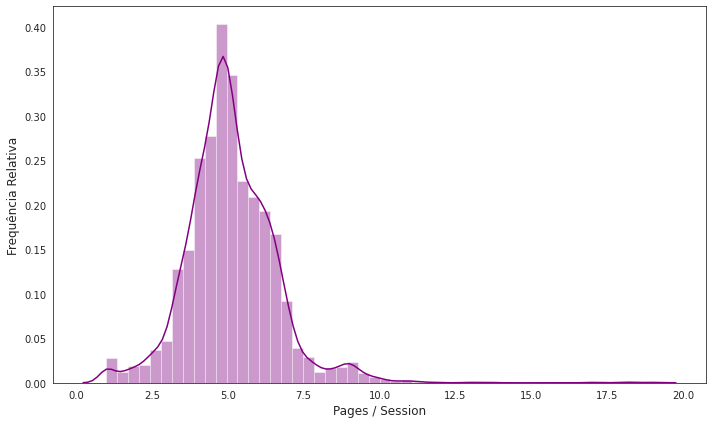

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(df['Pages / Session'], color='purple', kde=True)
ax.set_ylabel("Frequência Relativa", fontsize=12)
ax.set_xlabel("Pages / Session", fontsize=12)

plt.tight_layout()

Se quisermos visualizar APENAS a fdp (função densidade de probabilidade), passamos para o parâmetro "hist" o valor "False".

Para plotar mais de uma curva, criamos uma figura e um eixo (fig, ax) e o seaborn plotará tudo em cima dessa figura.

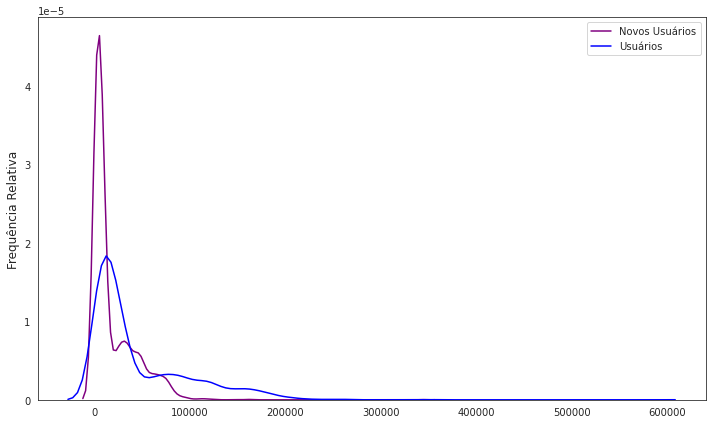

In [ ]:
# criando a figura e os eixos
fig, ax = plt.subplots(figsize=(10,6))

#primeira curva
sns.distplot(df['New Users'], color='purple', kde=True, hist=False, label='Novos Usuários')
#segunda curva
sns.distplot(df['Users'], color='blue', kde=True, hist=False, label='Usuários')

#ajustando os titulos dos eixos
ax.set_ylabel("Frequência Relativa", fontsize=12)
ax.set_xlabel("")

# como passamos o label dentro do distplot, podemos chamar em cima do eixo "ax", o método .legend()
ax.legend()

# pra deixar bonitinho
plt.tight_layout()

**Alguns métodos descritivos**
- *df['Col'].unique()*: valores unicos da coluna
- *df['Col'].nunique()*: numero de valores unicos
- *df['Col'].value_counts()*: contagem de valores
- *df['Col'].value_counts(normalize=True)* em porcentagens

In [ ]:
df['Default Channel Grouping'].unique()

array(['(Other)', 'Direct', 'Display', 'Organic Search', 'Paid Search',
       'Referral', 'Social', 'Email', 'Other Advertising'], dtype=object)

In [ ]:
df['Default Channel Grouping'].nunique()

9

In [ ]:
df['Default Channel Grouping'].value_counts()

Direct               485
Social               485
Paid Search          485
Organic Search       485
Display              485
Referral             485
(Other)              485
Email                331
Other Advertising      3
Name: Default Channel Grouping, dtype: int64

In [ ]:
df['Default Channel Grouping'].value_counts(normalize=True) * 100

Direct               13.006168
Social               13.006168
Paid Search          13.006168
Organic Search       13.006168
Display              13.006168
Referral             13.006168
(Other)              13.006168
Email                 8.876374
Other Advertising     0.080451
Name: Default Channel Grouping, dtype: float64

### Medidas Resumo

Aqui vamos usar a biblioteca numpy para obter algumas medidas do conjunto de dados

- Média, Mediana e Moda
- Desvio padrão, variância

Usando o numpy

In [ ]:
mean = np.mean(df['Sessions'])
median = np.median(df['Sessions'])

print('Média', mean)
print('Mediana ', median)

Média 55634.014212925715
Mediana  27869.0


Usando o Pandas

In [ ]:
media = df['Sessions'].mean()
mediana = df['Sessions'].median()
moda = df['Sessions'].mode()

print('Média', media)
print('Mediana ', mediana)
print('Moda ', moda)

Média 55634.014212925715
Mediana  27869.0
Moda  0    1.0
dtype: float64


Medidas de dispersao usando o numpy

In [ ]:
desvio = np.std(df['Sessions'])
variancia = np.var(df['Sessions'])

print('Desvio ', desvio)
print('Variancia ', variancia)

Desvio  62012.12048572895
Variancia  3845503087.1365643


Usando o pandas

In [ ]:
df['Sessions'].std() # desvio
df['Sessions'].var() # variancia

3846534606.2050023

### Boxplot

Referência:
https://seaborn.pydata.org/generated/seaborn.boxplot.html

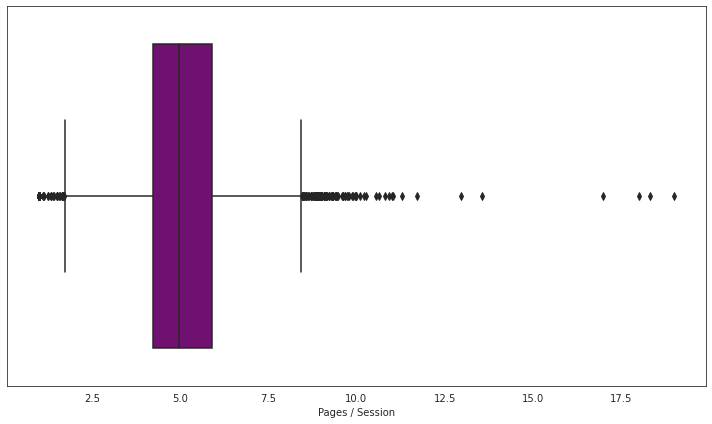

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(x = df['Pages / Session'], data=df , color='purple')

plt.tight_layout()

Quebrando em dimensões

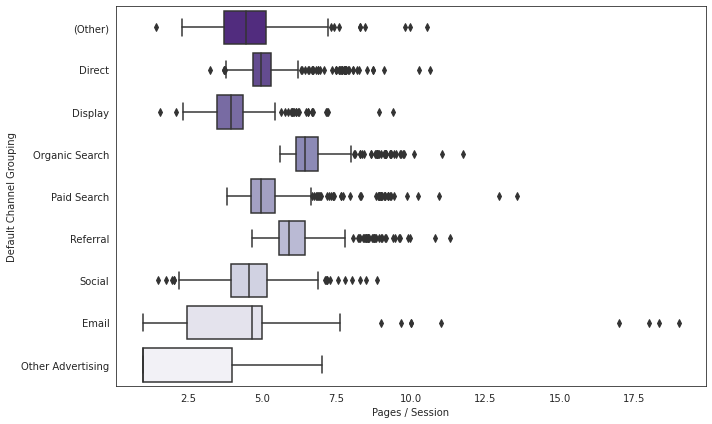

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(x = df['Pages / Session'], y='Default Channel Grouping', data=df , palette='Purples_r')

plt.tight_layout()

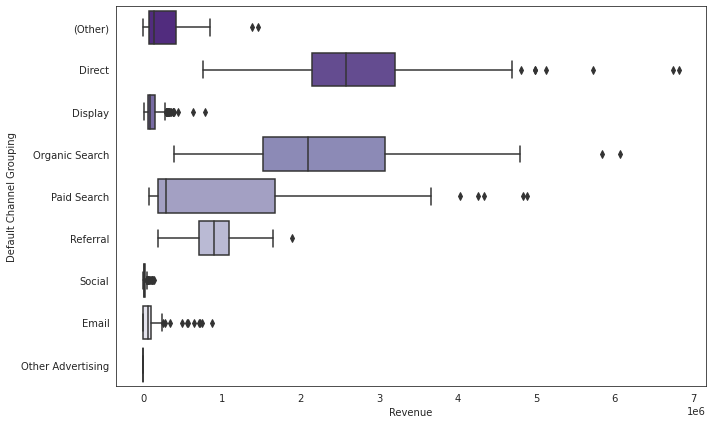

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(x = df['Revenue'], y='Default Channel Grouping', data=df , palette='Purples_r')

plt.tight_layout()

### Pandas Describe

O método describe traz as estatísticas do boxplot: primeiro quartil (25%), segundo quartil/mediana (50%), terceiro quartil (75%), além dos valores mínimos e máximo das variaveis, média, desvio padrão e contagem.

Utilizando todo o dataframe

In [ ]:
df.describe()

,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Avg. Order Value,Revenue
count,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3729.000000,3.729000e+03
mean,45335.205685,18423.106463,55634.014213,0.208617,5.104803,4.948172,0.019891,1394.227943,687.847895,9.451280e+05
std,51447.604032,22941.552213,62020.437004,0.142664,1.485331,1.947283,0.026449,1754.204523,244.129164,1.154741e+06
min,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,10566.000000,3045.000000,13523.000000,0.128500,4.240000,3.700000,0.007700,100.000000,589.830000,6.955834e+04
50%,22152.000000,7708.000000,27869.000000,0.169600,4.970000,5.016667,0.016600,414.000000,673.550000,3.203063e+05
75%,71526.000000,29681.000000,88707.000000,0.252600,5.920000,6.050000,0.029400,2446.000000,758.990000,1.598270e+06
max,580360.000000,344101.000000,724749.000000,1.000000,19.000000,38.066667,1.000000,13901.000000,2158.950000,6.817824e+06


Agrupando por Canal e usando o .T para transpor o dataframe (transformar as linhas em colunas e vice versa)

In [ ]:
df.groupby('Default Channel Grouping')[['Users', 'New Users']].describe().T

Default Channel Grouping        (Other)  ...        Social
Users     count              485.000000  ...    485.000000
          mean             17307.709278  ...   5247.698969
          std              13075.452858  ...   8572.502405
          min               2423.000000  ...    234.000000
          25%              10081.000000  ...    704.000000
          50%              15000.000000  ...   1841.000000
          75%              19217.000000  ...   4694.000000
          max             108638.000000  ...  57391.000000
New Users count              485.000000  ...    485.000000
          mean              6908.991753  ...   2651.575258
          std               6528.386023  ...   5142.860738
          min                601.000000  ...    101.000000
          25%               2892.000000  ...    320.000000
          50%               5392.000000  ...    669.000000
          75%               8304.000000  ...   1869.000000
          max              65426.000000  ...  40619.000000

[16 rows x 9 columns]

### Análise Bidimensional: Relação entre variáveis

#### Pairplot

Plota relação entre todas as variaveis do dataframe

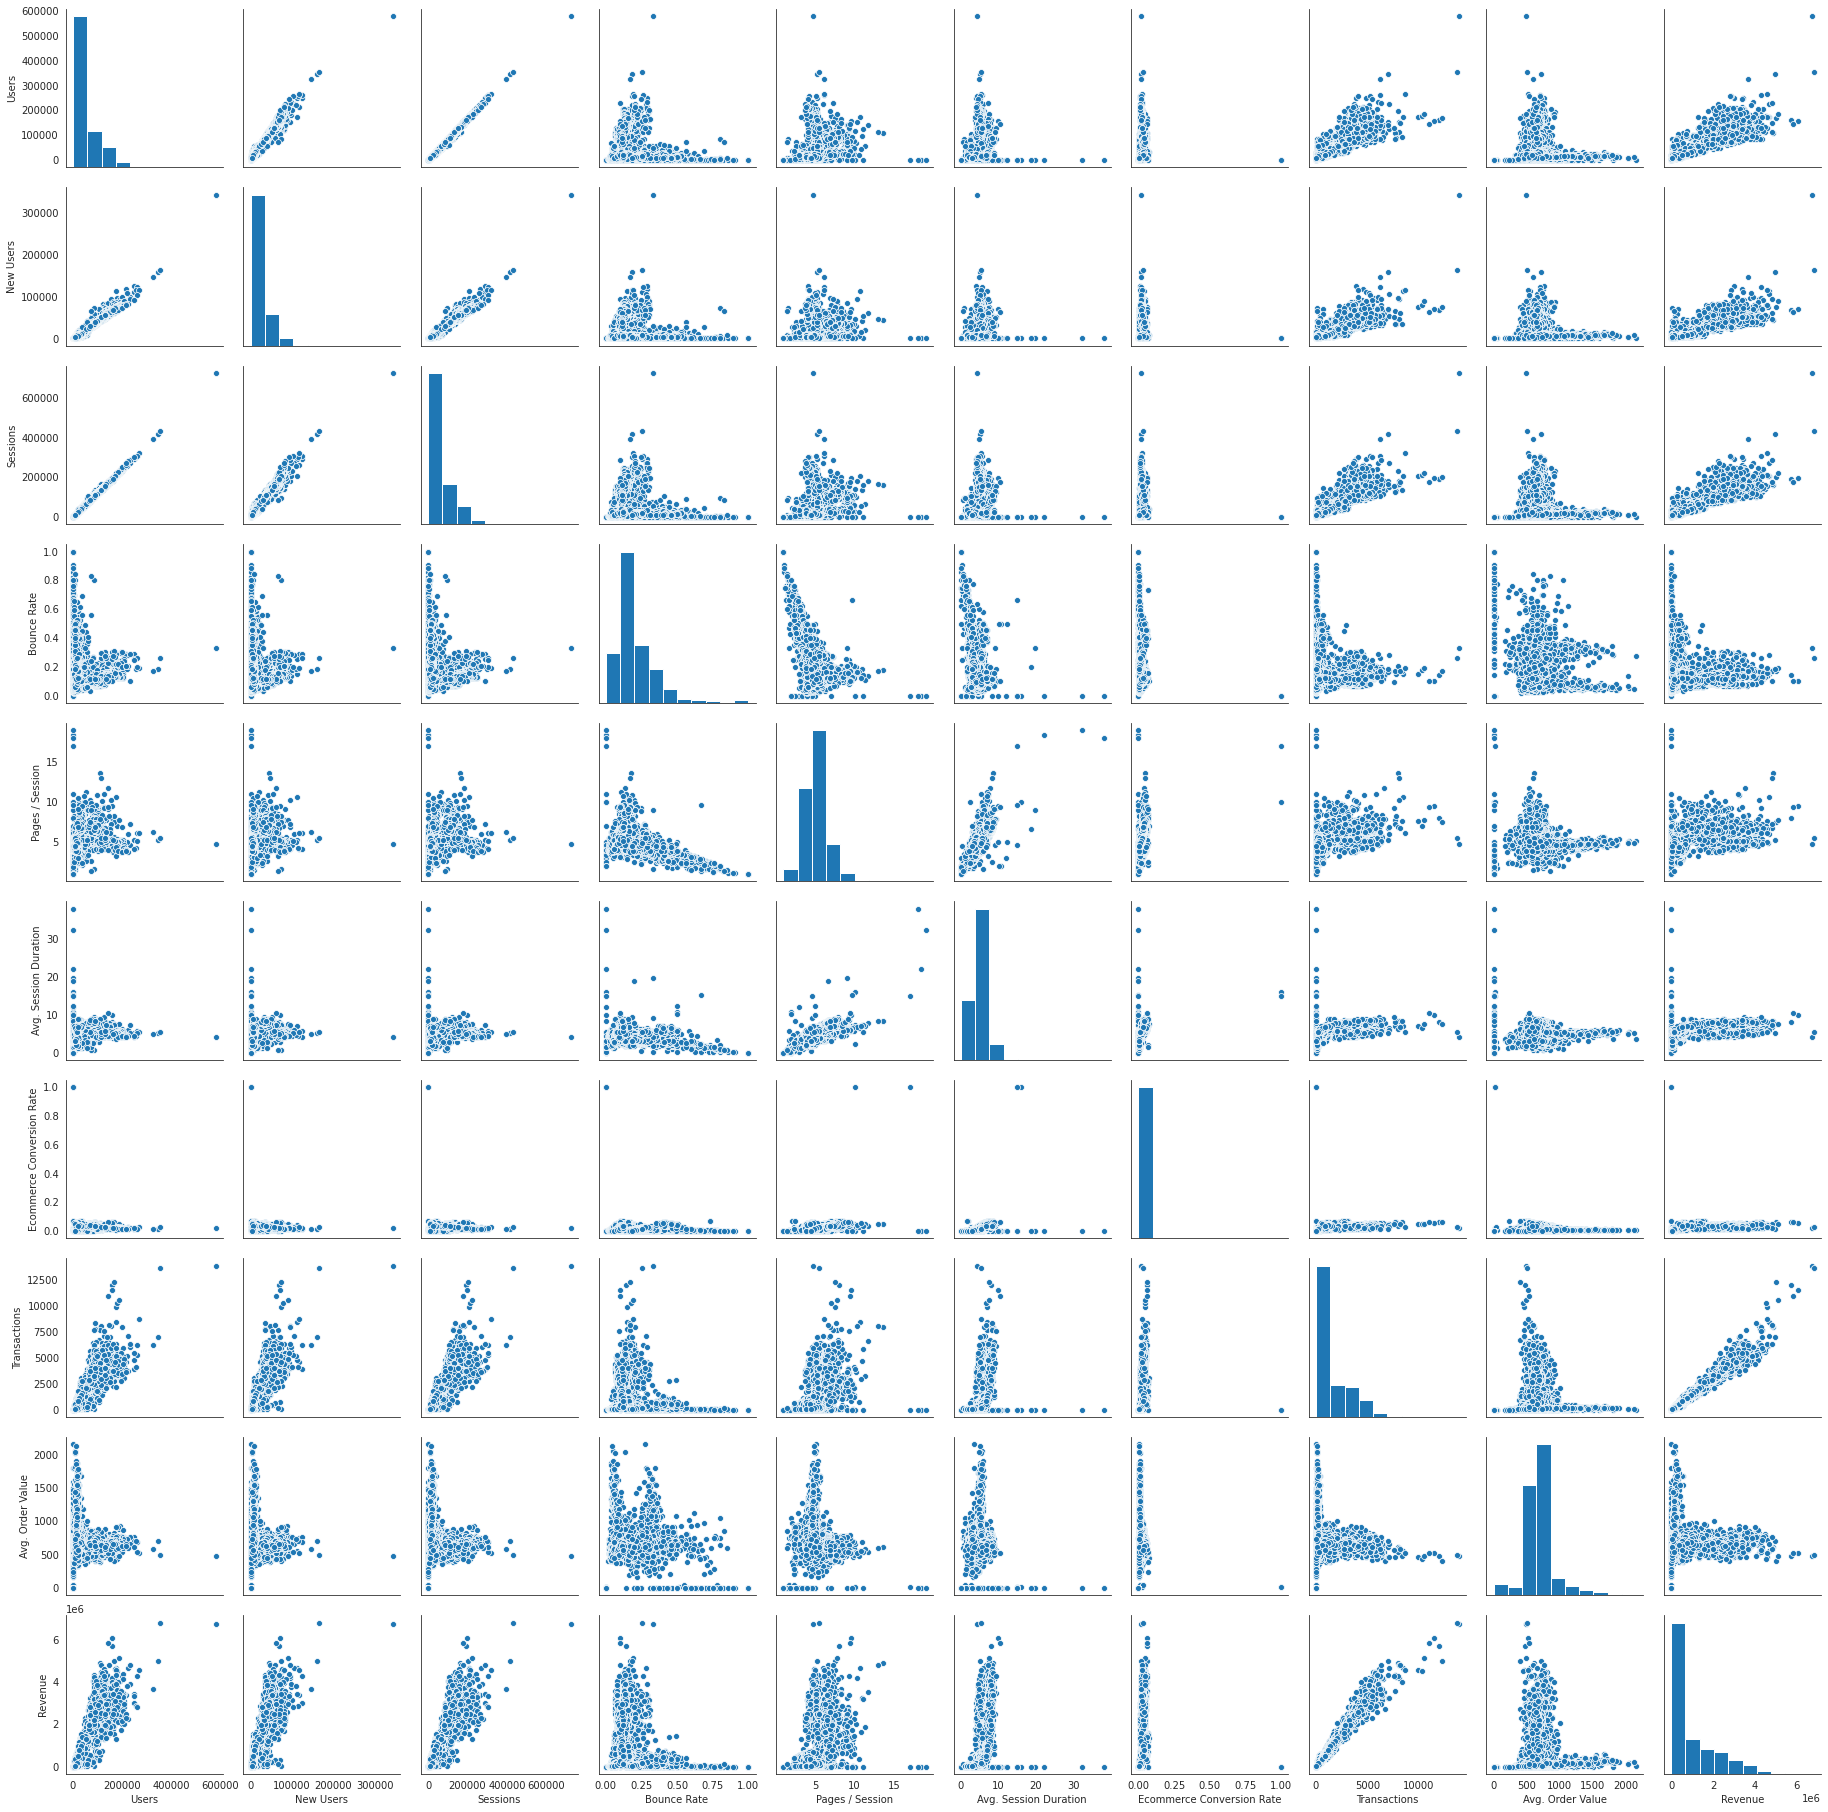

In [ ]:
sns.pairplot(df)

Eu posso também passar apenas as colunas que quero visualizar as relações.

O parâmetro **kind** pode recceber dois valores: scatter e reg.

Documentação: https://seaborn.pydata.org/generated/seaborn.pairplot.html

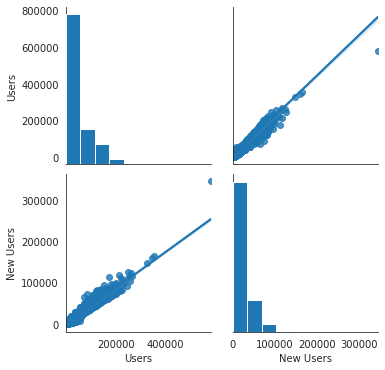

In [ ]:
sns.pairplot(df[['Users', 'New Users']],  kind='reg')

#### Jointplot

Relação entre duas variáveis, juntos com a distribuição de frequencias de cada uma.

Podem ser do tipo:
- “scatter” 
- “reg”
- “resid” 
- “kde” 
- “hex” 

https://seaborn.pydata.org/generated/seaborn.jointplot.html

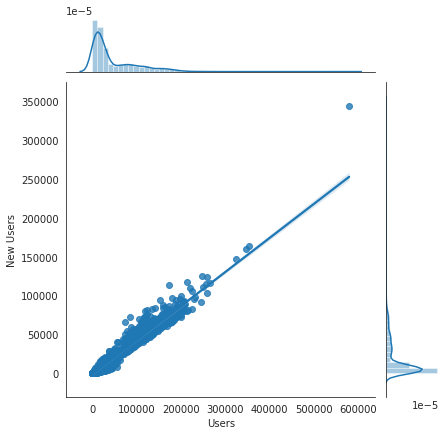

In [ ]:
sns.jointplot(x='Users', y='New Users', data=df, kind='reg')

O kde mostra a densidade de pontos

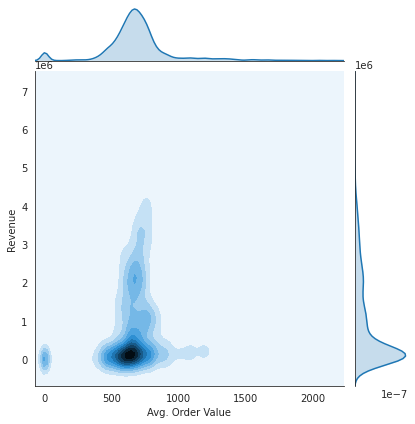

In [ ]:
sns.jointplot(x='Avg. Order Value', y='Revenue', data=df, kind='kde')

#### Count plot

Semelhante ao barplot, mas nesse caso funciona como um histograma para variaveis categóricas, uma vez que o eixo y mostra a frequência absoluta. 

Documentação: https://seaborn.pydata.org/generated/seaborn.countplot.html

Contagem de ocorrências dos valores categóricos

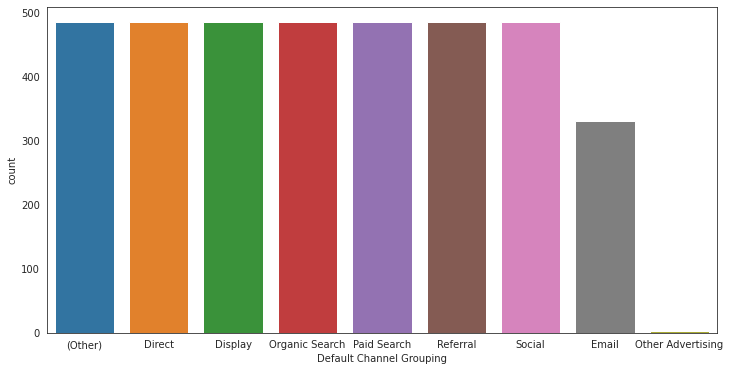

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='Default Channel Grouping', data=df)

#### Heatmap

**Matrix Plots**
- sns.heatmap(tabela)
- sns.heatmap(df.corr(), annot = True)

https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap

##### Pivot table no pandas

Aqui teremos os meses como indices, canais como colunas e os valores serão números de usuários

In [ ]:
table = pd.pivot_table(index=df.index.month, columns='Default Channel Grouping', values='Users', data=df)
table

Default Channel Grouping,(Other),Direct,Display,Email,Organic Search,Other Advertising,Paid Search,Referral,Social
Date,,,,,,,,,
1,14831.596774,139543.500000,17549.822581,8741.581395,96241.516129,NaN,49219.758065,34461.209677,5057.806452
2,16881.357143,129274.714286,12829.535714,12886.935484,81882.589286,NaN,39858.625000,27935.875000,3625.250000
3,17327.854839,144432.403226,10977.322581,7652.902439,75183.564516,NaN,36539.387097,24783.048387,2903.225806
4,26125.100000,159926.433333,23439.633333,14852.266667,83208.500000,NaN,39016.066667,25851.933333,6993.483333
5,14737.774194,119769.000000,10689.870968,45.727273,64095.774194,NaN,62010.000000,26923.935484,839.258065
6,18559.866667,133284.800000,15286.300000,4.857143,77004.566667,NaN,55762.800000,29762.333333,797.266667
7,16368.419355,145566.483871,14667.161290,2.736842,98329.870968,NaN,17323.612903,27889.709677,1599.096774
8,12439.096774,149119.129032,13030.419355,2.350000,99314.967742,NaN,17390.741935,29904.870968,1767.193548
9,10234.933333,150047.333333,30849.066667,3415.833333,94870.366667,NaN,16531.866667,31597.033333,544.433333


Agora faremos um heatmap para visualizar essa tabela

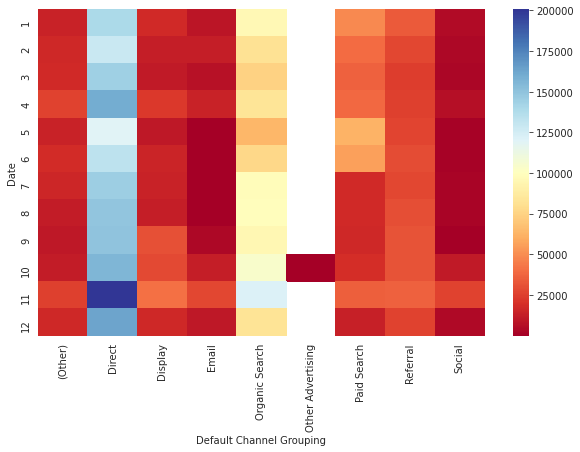

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(table, cmap='RdYlBu')

Heatmap com correlação entre variaveis

In [ ]:
# o metodo .corr() traz as correlações em forma de uma tabela
df.corr()

,Users,New Users,Sessions,Bounce Rate,Pages / Session,Avg. Session Duration,Ecommerce Conversion Rate,Transactions,Avg. Order Value,Revenue
Users,1.000000,0.983049,0.998594,-0.211956,0.282463,0.340061,0.171610,0.893790,0.006342,0.894235
New Users,0.983049,1.000000,0.980298,-0.173772,0.254115,0.301543,0.150577,0.870141,0.007951,0.865796
Sessions,0.998594,0.980298,1.000000,-0.211336,0.288599,0.344470,0.175356,0.897649,0.008066,0.898343
Bounce Rate,-0.211956,-0.173772,-0.211336,1.000000,-0.566941,-0.509246,-0.180390,-0.252802,-0.239892,-0.266273
Pages / Session,0.282463,0.254115,0.288599,-0.566941,1.000000,0.765941,0.391489,0.441715,0.065417,0.431330
Avg. Session Duration,0.340061,0.301543,0.344470,-0.509246,0.765941,1.000000,0.451255,0.514614,0.135078,0.529213
Ecommerce Conversion Rate,0.171610,0.150577,0.175356,-0.180390,0.391489,0.451255,1.000000,0.301869,-0.052373,0.295908
Transactions,0.893790,0.870141,0.897649,-0.252802,0.441715,0.514614,0.301869,1.000000,-0.032439,0.981386
Avg. Order Value,0.006342,0.007951,0.008066,-0.239892,0.065417,0.135078,-0.052373,-0.032439,1.000000,0.026656
Revenue,0.894235,0.865796,0.898343,-0.266273,0.431330,0.529213,0.295908,0.981386,0.026656,1.000000


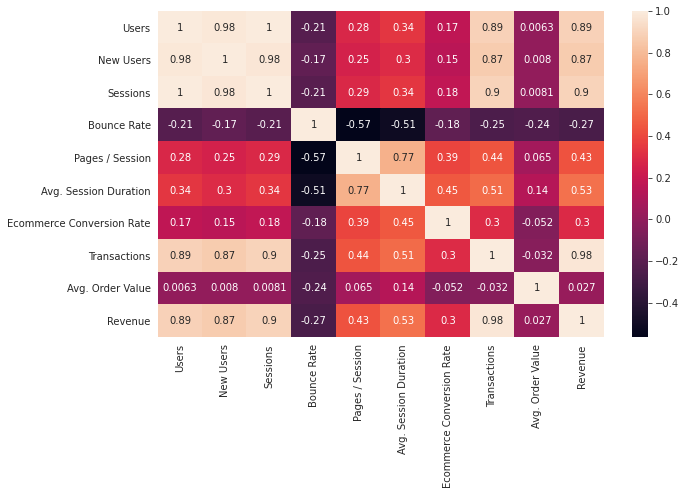

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot = True)

## Visualização de Séries Temporais

Para visualizar as variáveis em função do tempo, colocamos as datas como indices lá no inicio do notebook, lembram? 

Agora só precisamos passar as agregações que queremos e plotar.

Agregações

Método resample -> a série temporal agregada em 
- dias ('D')
- semanas ("W")
- meses ('M')

E depois passamos o método de agregação

df['Coluna'].resample('Código da agregação').método_agregação()


**Importante**: aqui usaremos as funções de plot própria do Pandas .plot()

#### Média diárias de usuários/receita/bounce etc

**Agregações**
- Diária: resample('D')
- Média: .mean()

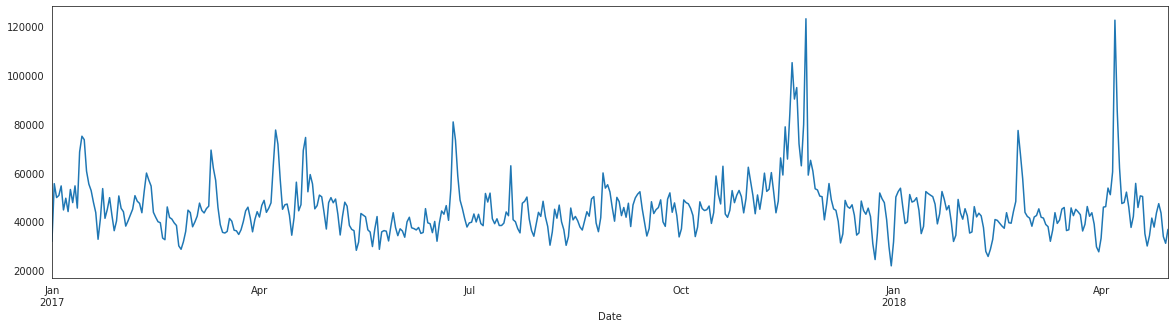

In [ ]:
df['Users'].resample('D').mean().plot(figsize=(20,5))

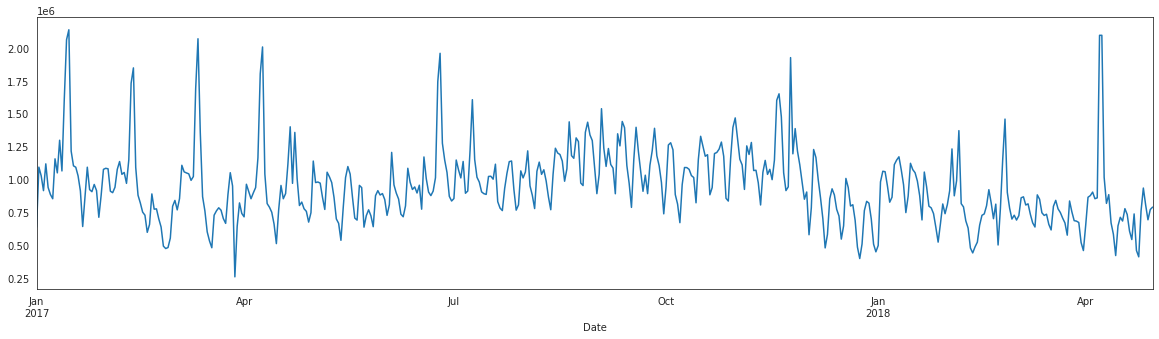

In [ ]:
df['Revenue'].resample('D').mean().plot(figsize=(20,5))

#### Evolução de Sessões por Semana e Mês

- Por semana: resample('W')
- Por mês: resample('M')

Agregação: .sum()

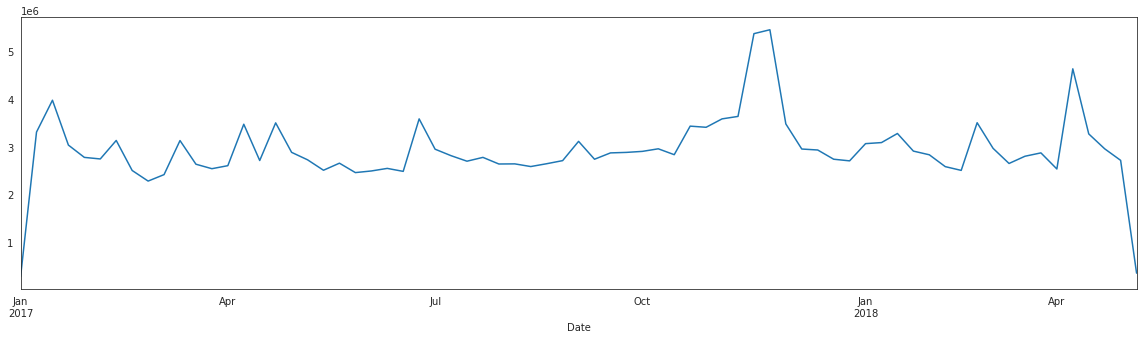

In [ ]:
df['Sessions'].resample('W').sum().plot(figsize=(20,5))

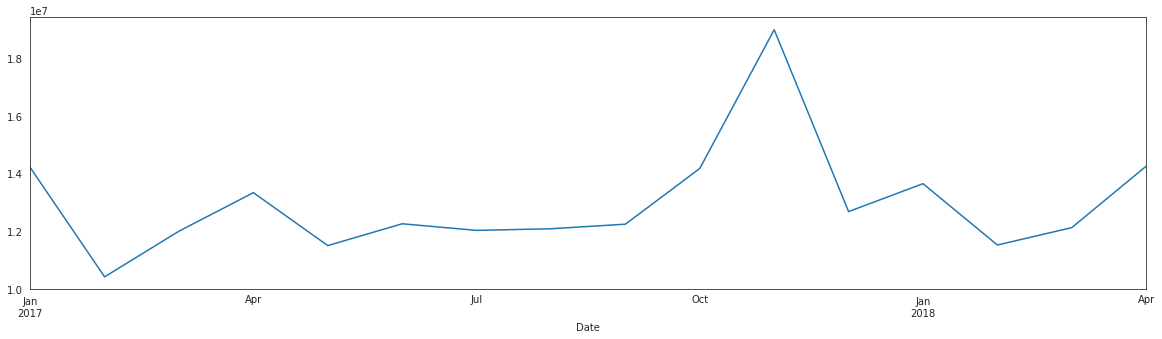

In [ ]:
df['Sessions'].resample('M').sum().plot(figsize=(20,5))

## [Apêndice] Visualização com o Pandas

Podemos fazer plots de gráficos usamos o próprio pandas.

Tipos:
* ‘line’ : line plot (default)
* ‘bar’ : vertical bar plot
* ‘barh’ : horizontal bar plot
* ‘hist’ : histogram
* ‘box’ : boxplot
* ‘kde’ : Kernel Density Estimation plot
* ‘density’ : mesmo que o ‘kde’
* ‘area’ : area plot
* ‘pie’ : grafico de pizza
* ‘scatter’ : scatter plot
* ‘hexbin’ : hexbin plot

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

Histograma

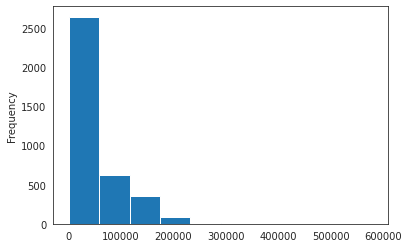

In [ ]:
df['Users'].plot(kind='hist')

Barplot

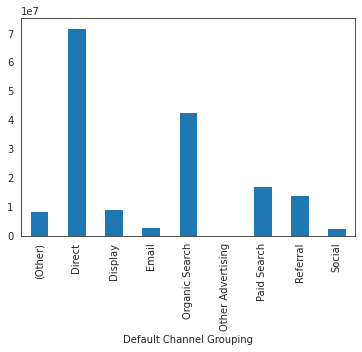

In [ ]:
df.groupby('Default Channel Grouping')['Users'].sum().plot(kind='bar')

## Dataframe 2
Aqui vamos ler outros dataframe e aplicar os conceitos que aprendemos anteriormente.

Fiquem livre pra fazer uma cópia desse notebook e explorar esses dados.


In [ ]:
df2 = pd.read_csv('/content/drive/My Drive/Estatística Descritiva/sessions.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df2.head()

,channelGrouping,date,fullVisitorId,socialEngagementType,visitId,visitNumber,visitStartTime,salesRegion,device_mobileDeviceMarketingName,device_screenColors,device_deviceCategory,device_flashVersion,device_mobileDeviceBranding,device_mobileDeviceModel,device_screenResolution,device_mobileDeviceInfo,device_language,device_browserSize,device_browser,device_operatingSystemVersion,device_browserVersion,device_operatingSystem,device_mobileInputSelector,device_isMobile,geoNetwork_metro,geoNetwork_city,geoNetwork_country,geoNetwork_cityId,geoNetwork_subContinent,geoNetwork_longitude,geoNetwork_latitude,geoNetwork_continent,geoNetwork_networkDomain,geoNetwork_networkLocation,geoNetwork_region,totals_pageviews,totals_newVisits,totals_totalTransactionRevenue,totals_hits,totals_bounces,totals_timeOnSite,totals_transactions,totals_sessionQualityDim,totals_visits,totals_transactionRevenue,trafficSource_adContent,trafficSource_campaign,trafficSource_source,trafficSource_referralPath,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium
0,Organic Search,20171016,579247845938461901,Not Socially Engaged,1508165231,1,1508165231,EMEA,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,United Kingdom,not available in demo dataset,Northern Europe,not available in demo dataset,not available in demo dataset,Europe,virginm.net,not available in demo dataset,not available in demo dataset,2.0,1.0,NaN,2,NaN,26.0,NaN,1.0,1,NaN,NaN,(not set),google,NaN,NaN,(not provided),organic
1,Organic Search,20171016,875141984250977091,Not Socially Engaged,1508223135,1,1508223135,APAC,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,Taiwan,not available in demo dataset,Eastern Asia,not available in demo dataset,not available in demo dataset,Asia,nthu.edu.tw,not available in demo dataset,not available in demo dataset,2.0,1.0,NaN,2,NaN,31.0,NaN,1.0,1,NaN,NaN,(not set),google,NaN,NaN,(not provided),organic
2,Organic Search,20171016,953429090981710815,Not Socially Engaged,1508193746,1,1508193746,North America,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,United States,not available in demo dataset,Northern America,not available in demo dataset,not available in demo dataset,Americas,iolo.com,not available in demo dataset,not available in demo dataset,3.0,1.0,NaN,3,NaN,72.0,NaN,1.0,1,NaN,NaN,(not set),google,NaN,NaN,(not provided),organic
3,Organic Search,20171016,2365540140634612791,Not Socially Engaged,1508161886,1,1508161886,NaN,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome,not available in demo dataset,not available in demo dataset,Android,not available

In [ ]:
list(df2)

['channelGrouping',
 'date',
 'fullVisitorId',
 'socialEngagementType',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'salesRegion',
 'device_mobileDeviceMarketingName',
 'device_screenColors',
 'device_deviceCategory',
 'device_flashVersion',
 'device_mobileDeviceBranding',
 'device_mobileDeviceModel',
 'device_screenResolution',
 'device_mobileDeviceInfo',
 'device_language',
 'device_browserSize',
 'device_browser',
 'device_operatingSystemVersion',
 'device_browserVersion',
 'device_operatingSystem',
 'device_mobileInputSelector',
 'device_isMobile',
 'geoNetwork_metro',
 'geoNetwork_city',
 'geoNetwork_country',
 'geoNetwork_cityId',
 'geoNetwork_subContinent',
 'geoNetwork_longitude',
 'geoNetwork_latitude',
 'geoNetwork_continent',
 'geoNetwork_networkDomain',
 'geoNetwork_networkLocation',
 'geoNetwork_region',
 'totals_pageviews',
 'totals_newVisits',
 'totals_totalTransactionRevenue',
 'totals_hits',
 'totals_bounces',
 'totals_timeOnSite',
 'totals_transactions',
 'totals_

A ideia é que vocês treinem o que aprenderam. :)


Qualquer dúvida, só chamar: 
- email: kayleighmeneghini@gmail.com
- linkedin: https://www.linkedin.com/in/kayleigh-meneghini-31095b156/